In [1]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import spacy
import re

In [2]:
raw_df = pd.read_excel(open('data.xlsx', 'rb'),
              sheet_name='All', ).fillna('') 
raw_df

,Dog,Elephant,Snake,Pig,Cow,Fish,Cat,Steak,Kebab,Pork,...,Plane,Skateboard,Helicopter,Bicycle,Computer,Keyboard,Monitor,CPU,TV,Phone
0,Does a dog have ears?,The appearance of the Asiatic elephant is fami...,There could be a snake in the daylight.,"If I promise not to act like a misogynist pig,...","The Latin word for ""cow"" is vacca.",The fish flipped and dived back into the water.,I think the cat wants dessert!,That's a long way to drive for steak and potat...,"The insane person, who will actually eat a kebab.","Your pork chops were a big hit, by the way.",...,I'll make a plane reservation.,It is a small park with a skateboard area.,We've got a helicopter on the way.,The boy no doubt inherits a capacity for ridin...,A computer can do some tasks better than a per...,"She began to paw at her computer keyboard, sea...","As he lifted the computer monitor, he caught s...","This year, Sony is seeking to top themselves w...",It's as safe as watching TV and a darned sight...,"The phone woke me up, even though it wasn't ve..."
1,Then let's have a seat and watch the puppy dog...,"Further, the skin is stated to be much less ro...","A mouse she could handle – literally, but a sn...","Oh, what a pig I am! he repeated, flushing sud...",Can't you eat a cow or a rabbit or something?,I ate very small fish for supper.,I'm in no mood to watch a cat fight tonight.,They each ordered a salad and steak and attack...,"You haven't had a dodgy doner kebab, have you?",The city is a manufacturing and railway centre...,...,I'm still not going to watch your plane leave.,Finding the right skateboard can sound like qu...,The helicopter dropped and caught.,He ran out to his bicycle and pushed the kicks...,I haven't been near a computer since before I ...,The keyboard has five keys similar to those of...,It's my responsibility to monitor and deter th...,And uses almost ALL CPU to actually log in.,The only thing you watch on TV is football and...,Is he listening to your phone call?
2,My dog scared them away.,The Indian region is the home of the Indian el...,"If there is a snake under it, that puts a rock...","He couldn't very well say, 'I really am that p...",Although the technique of growing cowpox on co...,"You can be a cold fish, sometimes.",The cat would like to eat the mouse.,He forked a steak off the serving tray and han...,I followed with Fish kebab (£ 10.95) - a bumpe...,"It is known for its pork pies, and has a trade...",...,The only thing left to do was pack and take a ...,"I'm 33, female, I skateboard a little, have do...",The helicopter lifted away before Brady had tw...,The only thing you watch on TV is football and...,Her phone and computer are monitored.,Each channel consists of a keyboard and receiv...,He turned away from the monitor and searched h...,We replaced the CPU soak tested for 48 hours a...,Let's go watch TV in the family room.,Martha handed her the phone and I could tell b...
3,"He held out his hand for the dog to sniff, but...",South of the Thames the thoroughfares crossing...,"In tropical waters a sea snake is found, which...","In 2006, a pig was genetically engineered to p...","Of animals, the cow and the pig are her favour...",Did you ever hunt or fish with your father?,A large grey cat was asleep on a rocking chair.,Says the veterinarian who envisioned steak lin...,They provide nothing for the serious kebab con...,Swine and pork are largely exported to Russia ...,...,"All right, I'll charter a plane for the morning.",Since 1999 we have been the UK 's premier onli...,She saw smoke moving across the sky a moment b...,"He wore bathing trunks, a Phillies baseball ca...","The computer screen before him was blank, but ...","Rita Angeltoni banged away on her keyboard, co...","After two hours' fighting, the ""Monitor"" was d...","The greater the number, the less CPU the proce...","I did TV too, a McDonald's commercial.",The phone woke me.
4,This dog helped him watch the sheep.,Mahmud ordered Hasan Maimandi to take the poet...,What if a

In [3]:
df = pd.DataFrame({'raw_character_text' : [], 'spoken_words': []})
df

,raw_character_text,spoken_words


In [4]:
for column in raw_df.columns:
  for value in raw_df[column]:
    if value:
      df = pd.concat([df, pd.DataFrame({'raw_character_text': [column], 'spoken_words': [value]})], ignore_index=True)

df

,raw_character_text,spoken_words
0,Dog,Does a dog have ears?
1,Dog,Then let's have a seat and watch the puppy dog...
2,Dog,My dog scared them away.
3,Dog,"He held out his hand for the dog to sniff, but..."
4,Dog,This dog helped him watch the sheep.
...,...,...
6066,Phone,It was an independent lab and when Cynthia too...
6067,Phone,"Before leaving the Beaumont, he looked at the ..."
6068,Phone,"The phone rang, precluding a pithy rejoinder, ..."
6069,Phone,Dean handed the phone to his wife as the light...


In [5]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop and (len(token) > 2 or str(token).lower() == 'tv')]

    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=-1)]

In [6]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(5817, 1)

In [7]:
final_df = df.copy()
final_df['cleaned'] = df_clean
final_df = final_df.dropna()

In [8]:
final_df

,raw_character_text,spoken_words,cleaned
1,Dog,Then let's have a seat and watch the puppy dog...,let seat watch puppy dog parade
2,Dog,My dog scared them away.,dog scare away
3,Dog,"He held out his hand for the dog to sniff, but...",hold hand dog sniff nikolai nuzzle nose instead
4,Dog,This dog helped him watch the sheep.,dog help watch sheep
5,Dog,The poor owner of the crumpled van sobbed over...,poor owner crumpled van sob accordioned quarte...
...,...,...,...
6066,Phone,It was an independent lab and when Cynthia too...,independent lab cynthia take bathroom break fr...
6067,Phone,"Before leaving the Beaumont, he looked at the ...",leave beaumont look recently publish ouray pho...
6068,Phone,"The phone rang, precluding a pithy rejoinder, ...",phone rang preclude pithy rejoinder cynthia el...
6069,Phone,Dean handed the phone to his wife as the light...,dean hand phone wife light go like comic book ...


In [9]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [10]:
final_df['vector'] = [sum((glove_vectors[word] for word in sentence.split() if word in glove_vectors))/len(sentence.split()) for sentence in final_df['cleaned']]

In [13]:
final_df[:100]

,raw_character_text,spoken_words,cleaned,vector
1,Dog,Then let's have a seat and watch the puppy dog...,let seat watch puppy dog parade,"[0.08168883, 0.13175082, -0.0095855, -0.142512..."
2,Dog,My dog scared them away.,dog scare away,"[0.12106666, 0.26156333, -0.12699066, 0.248753..."
3,Dog,"He held out his hand for the dog to sniff, but...",hold hand dog sniff nikolai nuzzle nose instead,"[-0.18019325, 0.2422346, -0.15117474, -0.15063..."
4,Dog,This dog helped him watch the sheep.,dog help watch sheep,"[0.094774745, 0.4375315, -0.0761535, -0.062555..."
5,Dog,The poor owner of the crumpled van sobbed over...,poor owner crumpled van sob accordioned quarte...,"[0.058573335, 0.07826967, -0.12326642, -0.0199..."
...,...,...,...,...
99,Dog,A dog is brought in to take a last look at his...,dog bring look inanimate master order drive aw...,"[-0.11351128, 0.049487304, -0.15171379, -0.175..."
100,Dog,There are a number of museums; the historical ...,number museum historical archaeological mediev...,"[0.045304965, 0.07711717, -0.1273688, 0.011607..."
101,Dog,"Lewis's prairie dog, the cottontail rabbit, th...",lewis prairie dog cottontail rabbit coyote gre...,"[-0.15674932, 0.17896384, -0.18494342, -0.1402..."
102,Dog,"The dog, the cat, the pig, the domestic fowl (...",dog cat pig domestic fowl obviously relate ban...,"[-0.04730175, 0.18858193, -0.07004429, -0.0957..."


ERROR! Session/line number was not unique in database. History logging moved to new session 24


In [30]:
word_annotations = {
 'dog': 'animal',
 'elephant': 'animal',
 'snake': 'animal',
 'pig': 'animal',
 'cow': 'animal',
 'fish': 'animal',
 'cat': 'animal',
 'steak': 'meal',
 'kebab': 'meal',
 'pork': 'meal',
 'salad': 'meal',
 'tomato': 'meal',
 'onion': 'meal',
 'car': 'vehicle',
 'motorcycle': 'vehicle',
 'bike': 'vehicle',
 'plane': 'vehicle',
 'skateboard': 'vehicle',
 'helicopter': 'vehicle',
 'bicycle': 'vehicle',
 'computer': 'device',
 'keyboard': 'device',
 'monitor': 'device',
 'cpu': 'device',
 'tv': 'device',
 'phone': 'device',
}

final_df['category'] = [word_annotations[x.lower()] for x in final_df['raw_character_text']]
final_df

,raw_character_text,spoken_words,cleaned,vector,category
1,Dog,Then let's have a seat and watch the puppy dog...,let seat watch puppy dog parade,"[0.08168883, 0.13175082, -0.0095855, -0.142512...",animal
2,Dog,My dog scared them away.,dog scare away,"[0.12106666, 0.26156333, -0.12699066, 0.248753...",animal
3,Dog,"He held out his hand for the dog to sniff, but...",hold hand dog sniff nikolai nuzzle nose instead,"[-0.18019325, 0.2422346, -0.15117474, -0.15063...",animal
4,Dog,This dog helped him watch the sheep.,dog help watch sheep,"[0.094774745, 0.4375315, -0.0761535, -0.062555...",animal
5,Dog,The poor owner of the crumpled van sobbed over...,poor owner crumpled van sob accordioned quarte...,"[0.058573335, 0.07826967, -0.12326642, -0.0199...",animal
...,...,...,...,...,...
6066,Phone,It was an independent lab and when Cynthia too...,independent lab cynthia take bathroom break fr...,"[-0.12689878, 0.06992889, -0.203124, -0.096265...",device
6067,Phone,"Before leaving the Beaumont, he looked at the ...",leave beaumont look recently publish ouray pho...,"[-0.15961999, 0.007944001, -0.14063899, -0.130...",device
6068,Phone,"The phone rang, precluding a pithy rejoinder, ...",phone rang preclude pithy rejoinder cynthia el...,"[-0.07464344, -0.16855583, -0.07618391, 0.1190...",device
6069,Phone,Dean handed the phone to his wife as the light...,dean hand phone wife light go like comic book ...,"[-0.09488568, -0.075915046, 0.0029790837, -0.2...",device


D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\dev\neural-semantic-embeddings\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

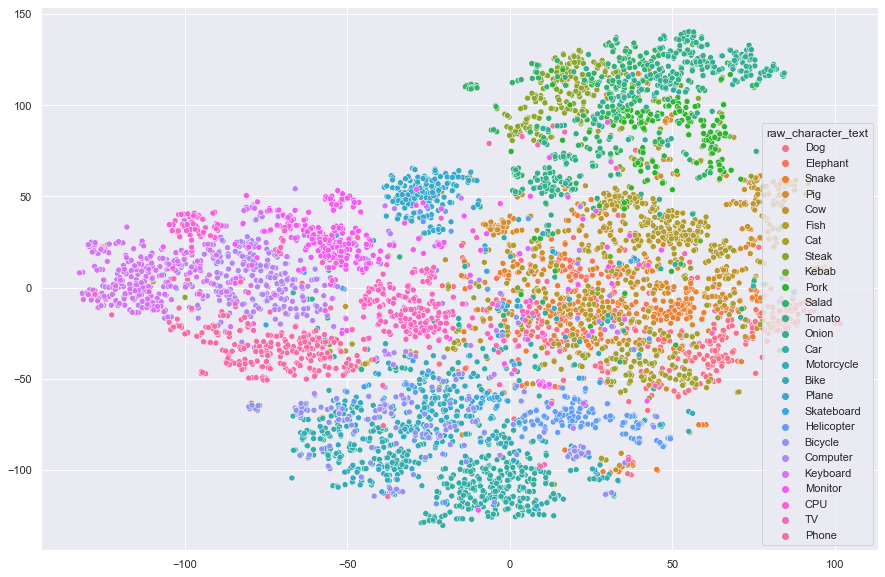

In [25]:
import seaborn as sns

X = [list(x) for x in final_df['vector']]

# for col in col_names:
#   X.append(glove_vectors[col])

tsne = TSNE(n_components=2, n_iter=3000, random_state=np.random.RandomState(20), perplexity=10)
X_tsne = tsne.fit_transform(X)

D:\dev\neural-semantic-embeddings\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

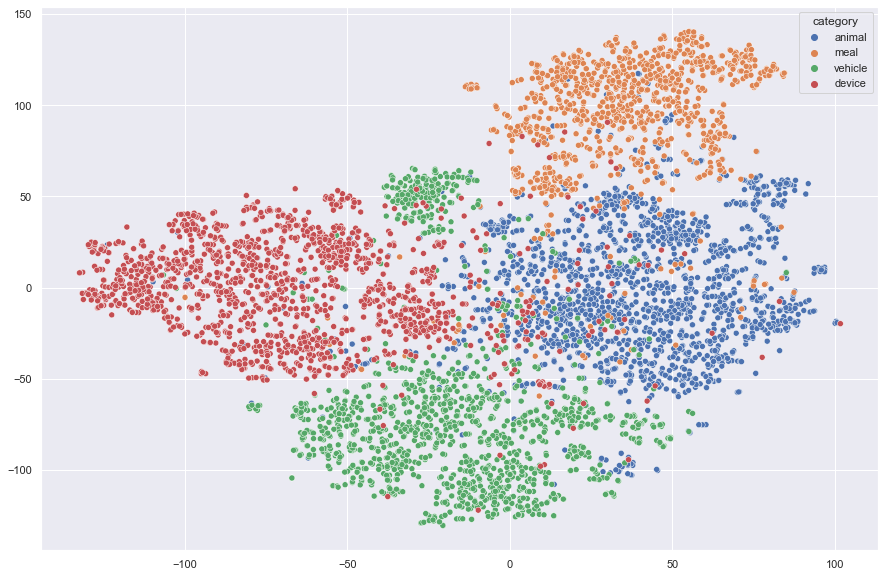

In [42]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=final_df['category'])

D:\dev\neural-semantic-embeddings\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

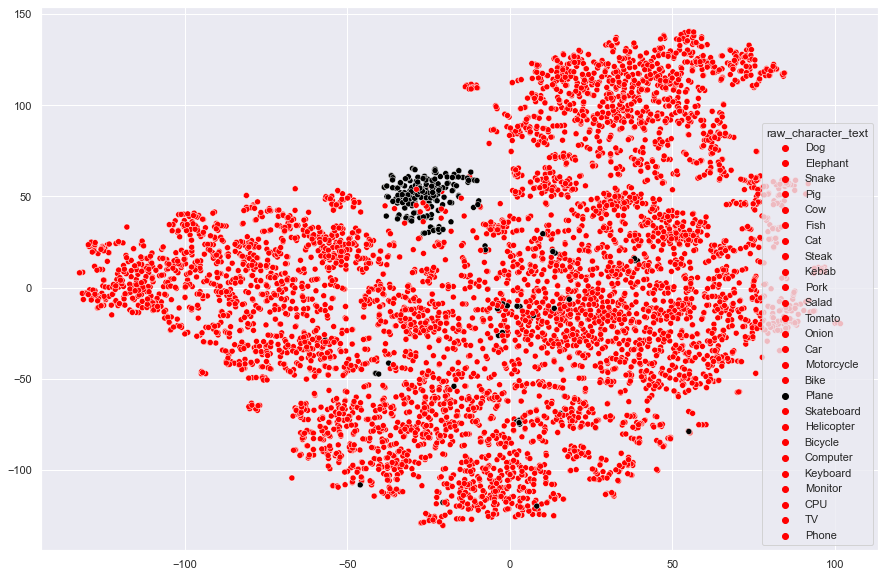

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
palette ={'Snake': "red", 'Plane': "black", 'Onion': "red", 'Computer': "red", 'Pork': "red", 'Steak': "red", 'Keyboard': "red", 'Pig': "red", 'Helicopter': "red", 'Cat': "red", 'Monitor': "red", 'Bike': "red", 'Kebab': "red", 'Dog': "red", 'Phone': "red", 'Skateboard': "red", 'Elephant': "red", 'Motorcycle': "red", 'Tomato': "red", 'Car': "red", 'CPU': "red", 'TV': "red", 'Salad': "red", 'Cow': "red", 'Fish': "red", 'Bicycle': "red"}
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=final_df['raw_character_text'], palette=palette)